In [1]:
import numpy as np
import pandas as pd

In [2]:
!pip install scikit-learn

In [3]:
import sklearn

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [5]:
crop = pd.read_csv("final crop.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,37.000000,30.000000,34.000000,27.539075,53.635495,6.797779,99.354082,mango
1,46.534638,34.880990,90.734325,25.773682,79.593288,6.477466,85.865569,apple
2,16.463391,105.430706,69.872653,26.976619,102.002123,7.076716,67.165085,muskmelon
3,74.175425,-12.078425,21.287024,34.269941,58.250688,6.686496,154.600288,apple
4,41.099239,10.118283,37.458900,30.262871,73.284020,5.766613,169.906773,jute


In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6200 entries, 0 to 6199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            6200 non-null   float64
 1   P            6200 non-null   float64
 2   K            6200 non-null   float64
 3   temperature  6200 non-null   float64
 4   humidity     6200 non-null   float64
 5   ph           6200 non-null   float64
 6   rainfall     6200 non-null   float64
 7   label        6200 non-null   object 
dtypes: float64(7), object(1)
memory usage: 387.6+ KB


In [7]:
crop.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.086211,-0.065671,0.005646,0.067793,0.043859,0.019761
P,-0.086211,1.000000,0.267832,-0.038703,-0.018886,-0.040291,-0.031943
K,-0.065671,0.267832,1.000000,-0.046754,0.071665,-0.057581,-0.024923
temperature,0.005646,-0.038703,-0.046754,1.000000,0.076883,-0.010419,-0.008409
humidity,0.067793,-0.018886,0.071665,0.076883,1.000000,0.017256,0.026173
ph,0.043859,-0.040291,-0.057581,-0.010419,0.017256,1.000000,-0.035176
rainfall,0.019761,-0.031943,-0.024923,-0.008409,0.026173,-0.035176,1.000000


<Axes: >

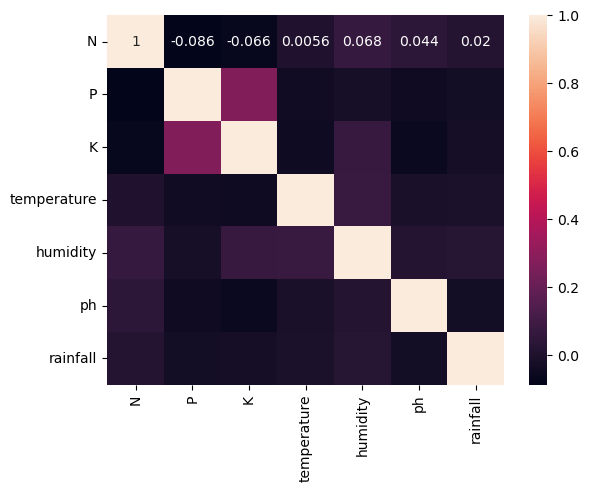

In [8]:
import seaborn as sns
sns.heatmap(crop.corr(numeric_only = True), annot = True, cbar = True)

In [9]:
# Numerical Stats (mean, min, max, count)
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000,6200.000000
mean,50.640033,54.138712,48.345986,25.576561,71.454560,6.459851,104.139526
std,36.491343,33.195819,51.283455,5.119407,22.040580,0.784864,54.930625
min,-71.677142,-61.438889,-142.639402,4.605613,-5.292684,3.504752,-94.424591
25%,24.000000,30.934859,18.874486,22.303279,57.540653,5.937202,66.286817
50%,46.635618,53.090230,40.400399,25.518655,74.172961,6.448785,101.027317
75%,78.259969,73.000000,73.611104,28.790072,87.630628,6.961958,138.959395
max,184.613666,174.762589,220.909164,44.273577,145.220605,9.935091,300.336462


In [10]:
# Check the data types of each column to identify non-numeric columns
print(crop.dtypes)

N              float64
P              float64
K              float64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [11]:
# Drop non-numeric columns
numeric_data = crop.select_dtypes(include=[float, int])

In [12]:
#Check for duplicate entries in dataset
crop.duplicated().sum()

0

In [13]:
import matplotlib.pyplot as plt

C:\Users\mehul\AppData\Local\Temp\ipykernel_10780\1923187426.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['K'])
E:\Users\mehul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


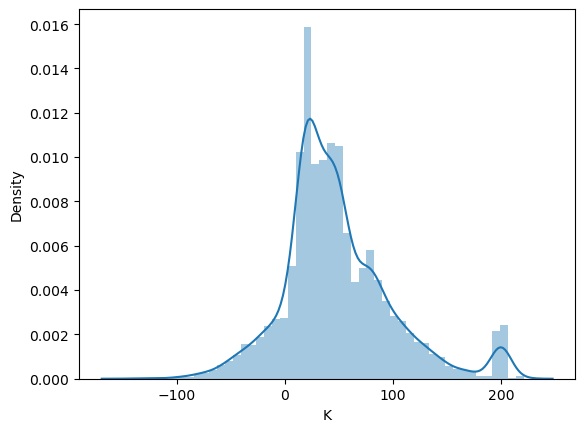

In [14]:
#distrubution plot representation wrt temperature 

sns.distplot(crop['K'])
plt.show()

In [15]:
# Encoding 

In [16]:
print("Average ratio of Nitrogen in Soil:{0: .2f}".format(crop["N"].mean()))
#ratio_of_nitrogen = "Ratio of Nitrogen in Soil: {:.2f}".format(crop["N"].mean())

print("Average ratio of Phosphorus in Soil:{0: .2f}".format(crop["P"].mean()))

print("Average ratio of Potassium in Soil:{0: .2f}".format(crop["K"].mean()))

print("Average ratio of Temperature in celcius:{0: .2f}".format(crop["temperature"].mean()))

print("Average relative humdity in %:{0: .2f}".format(crop["humidity"].mean()))

print("Average pH value of the Soil:{0: .2f}".format(crop["ph"].mean()))

print("Average rainfall in mm:{0: .2f}".format(crop["rainfall"].mean()))

#print(ratio_of_nitrogen)
 # of Nitrogen in Soil:{0: ,2f}".format(crop["N"].mean()))

Average ratio of Nitrogen in Soil: 50.64
Average ratio of Phosphorus in Soil: 54.14
Average ratio of Potassium in Soil: 48.35
Average ratio of Temperature in celcius: 25.58
Average relative humdity in %: 71.45
Average pH value of the Soil: 6.46
Average rainfall in mm: 104.14


In [17]:
# Summary Statistics for each of the Crop
# Group by 'label' and calculate summary statistics
summary_stats = crop.groupby('label').agg({
    'N': ['min', 'mean', 'max'],
    'P': ['min', 'mean', 'max'],
    'K': ['min', 'mean', 'max'],
    'temperature': ['min', 'mean', 'max'],
    'humidity': ['min', 'mean', 'max'],
    'ph': ['min', 'mean', 'max'],
    'rainfall': ['min', 'mean', 'max']
})

print(summary_stats)

                     N                                 P             \
                   min       mean         max        min       mean   
label                                                                 
apple       -46.626831  40.693712  141.609734 -41.789771  81.630454   
banana      -71.677142  66.056424  137.539761 -33.588223  67.136211   
blackgram   -41.943244  48.147736  155.075338 -40.584654  58.881257   
chickpea    -31.925037  49.752672  142.318679 -59.564292  57.446687   
coconut     -71.081995  42.687473  181.448602 -13.049457  42.287054   
coffee      -52.958794  64.810368  138.805261 -42.556541  45.510756   
cotton      -47.038186  77.325590  140.000000 -37.717618  49.677913   
grapes      -65.729336  42.082742  162.310645 -24.561292  82.508434   
jute        -40.754599  61.126917  141.893719 -25.365028  49.069236   
kidneybeans -69.600058  39.646025  164.022632 -31.506436  59.433390   
lentil      -35.890888  38.897426  172.060973 -47.062852  60.227215   
maize 

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
# Separate the label column from the features


labels = crop['label']  #'label' is the column I want to exclude from my scaling
features = crop.drop(columns=['label'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_crop = pd.DataFrame(scaled_features, columns=features.columns)

# Add the label column back to the scaled DataFrame
scaled_crop['label'] = labels


print(scaled_crop.head())

          N         P         K  temperature  humidity        ph  rainfall  \
0  0.424038  0.387122  0.485876     0.578136  0.391515  0.512108  0.490876   
1  0.461241  0.407787  0.641933     0.533631  0.563977  0.462295  0.456707   
2  0.343908  0.706471  0.584549     0.563956  0.712859  0.555486  0.409335   
3  0.569090  0.208976  0.450907     0.747816  0.422178  0.494802  0.630824   
4  0.440033  0.302950  0.495390     0.646800  0.522058  0.351748  0.669598   

       label  
0      mango  
1      apple  
2  muskmelon  
3      apple  
4       jute  


In [20]:
scaled_crop.to_csv("scaled_final_crop.csv", index=False)

In [21]:
crop['label'].unique()

array(['mango', 'apple', 'muskmelon', 'jute', 'cotton', 'grapes',
       'kidneybeans', 'mungbean', 'papaya', 'blackgram', 'coconut',
       'pomegranate', 'orange', 'banana', 'chickpea', 'watermelon',
       'rice', 'pigeonpeas', 'maize', 'lentil', 'coffee', 'mothbeans'],
      dtype=object)

In [22]:
crop['label'].unique().size

22

C:\Users\mehul\AppData\Local\Temp\ipykernel_10780\3669751595.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crop['N'])
E:\Users\mehul\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


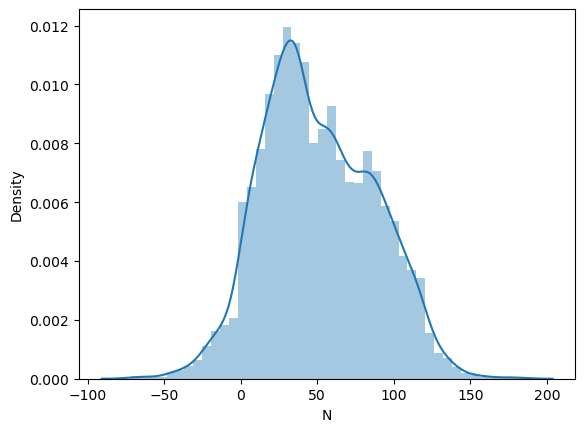

In [23]:
sns.distplot(crop['N'])
plt.show()

In [24]:
crop_dict = {
    'rice' : 1,
    'maize' : 2,
    'jute' : 3,
    'cotton' : 4,
    'coconut' : 5,
    'papaya' : 6,
    'orange' : 7,
    'apple' : 8,
    'muskmelon' : 9,
    'watermelon' : 10,
    'grapes' : 11,
    'mango' : 12,
    'banana' : 13,
    'pomegranate' : 14,
    'lentil' : 15,
    'blackgram' : 16,
    'mungbean' : 17,
    'mothbeans' : 18,
    'pigeonpeas' : 19,
    'kidneybeans' : 20,
    'chickpea' : 21,
    'coffee' : 22,
}   

crop['label'] = crop['label'].map(crop_dict)

In [25]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,37.000000,30.000000,34.000000,27.539075,53.635495,6.797779,99.354082,12
1,46.534638,34.880990,90.734325,25.773682,79.593288,6.477466,85.865569,8
2,16.463391,105.430706,69.872653,26.976619,102.002123,7.076716,67.165085,9
3,74.175425,-12.078425,21.287024,34.269941,58.250688,6.686496,154.600288,8
4,41.099239,10.118283,37.458900,30.262871,73.284020,5.766613,169.906773,3


In [26]:
crop['label'].unique()

array([12,  8,  9,  3,  4, 11, 20, 17,  6, 16,  5, 14,  7, 13, 21, 10,  1,
       19,  2, 15, 22, 18], dtype=int64)

In [27]:
X = crop.drop('label', axis = 1)
Y = crop['label']

In [28]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,37.000000,30.000000,34.000000,27.539075,53.635495,6.797779,99.354082
1,46.534638,34.880990,90.734325,25.773682,79.593288,6.477466,85.865569
2,16.463391,105.430706,69.872653,26.976619,102.002123,7.076716,67.165085
3,74.175425,-12.078425,21.287024,34.269941,58.250688,6.686496,154.600288
4,41.099239,10.118283,37.458900,30.262871,73.284020,5.766613,169.906773


In [29]:
Y.head()

0    12
1     8
2     9
3     8
4     3
Name: label, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [31]:
X_train.shape

(4960, 7)

In [32]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [33]:
X_train

array([[0.37008145, 0.48873059, 0.44736637, ..., 0.59084953, 0.49531963,
        0.34308786],
       [0.37403205, 0.41675814, 0.45836903, ..., 0.32899384, 0.69780933,
        0.3252166 ],
       [0.54278036, 0.36788283, 0.36270803, ..., 0.43990067, 0.37884942,
        0.20116123],
       ...,
       [0.29005415, 0.43943651, 0.655517  , ..., 0.516363  , 0.34375681,
        0.54952739],
       [0.67723265, 0.67703949, 0.52245973, ..., 0.56706506, 0.4514498 ,
        0.37327487],
       [0.43133046, 0.46542402, 0.45085745, ..., 0.2380061 , 0.43548   ,
        0.73822507]])

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [35]:
!pip install --upgrade scikit-learn

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [37]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
}

In [38]:
for name, model in models.items(): 
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    score = accuracy_score(Y_test, Y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.31370967741935485
GaussianNB model with accuracy: 0.34596774193548385
SVC model with accuracy: 0.37661290322580643
KNeighborsClassifier model with accuracy: 0.38548387096774195
DecisionTreeClassifier model with accuracy: 0.36612903225806454
ExtraTreeClassifier model with accuracy: 0.3008064516129032
RandomForestClassifier model with accuracy: 0.3935483870967742
BaggingClassifier model with accuracy: 0.3919354838709677
GradientBoostingClassifier model with accuracy: 0.38387096774193546


E:\Users\mehul\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model with accuracy: 0.3024193548387097


In [39]:
randclf = RandomForestClassifier()
randclf.fit(X_train, Y_train)
Y_pred = randclf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.3870967741935484

In [40]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [41]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [42]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,37.000000,30.000000,34.000000,27.539075,53.635495,6.797779,99.354082,12
1,46.534638,34.880990,90.734325,25.773682,79.593288,6.477466,85.865569,8
2,16.463391,105.430706,69.872653,26.976619,102.002123,7.076716,67.165085,9
3,74.175425,-12.078425,21.287024,34.269941,58.250688,6.686496,154.600288,8
4,41.099239,10.118283,37.458900,30.262871,73.284020,5.766613,169.906773,3


In [43]:
N=46
P= 34.88
K= 90.74
temperature= 25.78
humidity=79.61
ph=6.478
rainfall=85.86

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [44]:
predict

array([18], dtype=int64)

In [45]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph= 6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

predict

array([18], dtype=int64)

In [46]:
# serialize and deserialize (storing in a database)

import pickle
pickle.dump(randclf, open('Model.pkl', 'wb'))
pickle.dump(mx, open('MinMaxScaler.pkl', 'wb'))
pickle.dump(sc, open('Standard.pkl', 'wb'))